In [1]:
# Run if the wordcloud library is not already installed on your machine. 
# ! pip install wordcloud

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [3]:
# partial_preprocessed_df contains data that has only be processed through the 01_Data_Cleaning notebook.
partial_preprocessed_df = pd.read_csv("./data/Processed/wsb_crypto_preprocessed_2073132.csv")

# full_preprocessed_df contains data that has been processed through both the 01_Data_Cleaning and the 02_Cleaning_With_spaCy notebnooks.
full_preprocessed_df = pd.read_csv("./data/Processed/Processed_Through_Lemmatization_2073132_ALL_DATA.csv")

## Data exploration helper functions

In [4]:
# =========================================================================================================
# This function takes in a dataframe and returns the same dataframe with an additional column 'word_count'
# added to it, which contains how many words were in the associated reddit post.
# =========================================================================================================
def add_word_count(df):
    
    df['all_text_data'] = df['all_text_data'].astype(str)
    
    df['word_count'] = df['all_text_data'].apply(lambda text: len(text.split()))
    
    return df

In [5]:
# =========================================================================================================
# This function takes as input a dataframe containing a 'word_count' column that represents the
# number of words that are in given post. 
#
# This function then prints a set of statistics describing the distribution of word counts across all posts.
# =========================================================================================================
def print_word_count_info(df):
    
    min_word_count = df['word_count'].min()
    max_word_count = df['word_count'].max()
    median_word_count = df['word_count'].median()
    avg_word_count = df['word_count'].mean()
    seventy_fifth = df['word_count'].quantile(q=0.75)
    ninety = df['word_count'].quantile(q=0.90)
    twenty_fifth = df['word_count'].quantile(q=0.25)
        
    # grab num samples in the df
    total_samples = len(df.index)
    print("=======================================================================")
    print("Word Count Info...\n")
    print(f"Min word count: {min_word_count}")
    print(f"25th Percentile: {twenty_fifth}")
    print(f"Median word count {median_word_count}")
    print(f"75th percentile: {seventy_fifth}")
    print(f"90th percentile: {ninety}")
    print(f"Max word count: {max_word_count}")
    print(f"Average word count: {avg_word_count}")
    print("=======================================================================\n")
    

In [6]:
# =========================================================================================================
# This function takes as input two dataframes:
# 1. full_preprocessed (data that has been processed through both 01_Data_Cleaning and 02_Cleaning_With_spaCy)
# 2. partial_preprocessed (data that has only been processed through 01_Data_Cleaning)
#
# This function calls the print_word_count_info function on each dataframe, which allows the before and
# after lemmatization distributions to be easily compared.
#
# This function can also be used to get word count statistics for a single dataframe by leaving either
# the full_preprocessed or partial_preprocessed parameter set to their default value of 'None'
# =========================================================================================================
def compare_partial_to_fully_preprocessed_posts(full_preprocessed=None, partial_preprocessed=None, print_heading=True):
    
    if partial_preprocessed is not None:
        if print_heading:
            print("Posts without stop word removal or lemmatization.")
        partial_preprocessed = add_word_count(partial_preprocessed)
        print_word_count_info(partial_preprocessed)
    
    if full_preprocessed is not None:
        if print_heading:
            print("Posts with stop word removal and lemmatization.")
        full_preprocessed = add_word_count(full_preprocessed)
        print_word_count_info(full_preprocessed)
    

In [7]:
# =========================================================================================================
# This function takes the follow inputs:
#
# 1) dfs - a list of (name, dataframe) tuples where the dataframe contains reddit posts. A typical example
#    might be as follows ---> [("train", train_df), ("validation", val_df), ("test", test_df)]
# 2) An optional list of "below" thresholds
# 3) An optional list of "above" thresholds
#
# This function will then print, for each dataframe, the following:
#
# 1) Word count statistics
# 2) The number of and percentage of samples where the string length is below each "below" character threshold
# 3) The number of and percentage of samples where the string length is above each "above" character threshold
#
# The purpose of this function is to get a better understanding of how the post lengths (in terms of the
# number of characters) compare across a list of datasets.
# =========================================================================================================
def sample_percentages(dfs, below=[1, 2, 5, 10, 25], above=[75, 100]):
    
    thresholds = {'below' : below, 
                  'above' : above}
    
    # For each of the train, test and val dfs
    for index, df_info in enumerate(dfs):
        
        # grab the name and the df
        name, df = df_info
        
        # Grab num samples in the df, used for calculating percentages.
        total_samples = len(df.index)
        
        # Print the word count data for this dataframe.
        print(f"{name} Word Count Data...")
        compare_partial_to_fully_preprocessed_posts(df, print_heading=False)
        
        # Print the character count data for this dataframe.
        print(f"{name} Character Count Data...")
        print("========================================================================================================================\n")
        print("Below num_character thresholds:")
        for val in thresholds['below']:
            num_samples = len(df.loc[df['all_text_data'].str.len() <= val, :].index)
            print(f"Number of samples with less than or equal to {val} characters: {num_samples}, percentage: {num_samples/total_samples}")
        
        print("\n")
        
        print("Above num_character thresholds:")
        for val in thresholds['above']:
            num_samples = len(df.loc[df['all_text_data'].str.len() >= val, :].index)
            print(f"Number of samples with greater than or equal to {val} characters: {num_samples}, percentage: {num_samples/total_samples}")
        print("========================================================================================================================\n")


In [8]:
sample_percentages(dfs=[("All Lemmatized Posts", full_preprocessed_df)])

All Lemmatized Posts Word Count Data...
Word Count Info...

Min word count: 1
25th Percentile: 3.0
Median word count 6.0
75th percentile: 11.0
90th percentile: 27.0
Max word count: 7862
Average word count: 15.199024953548545

All Lemmatized Posts Character Count Data...

Below num_character thresholds:
Number of samples with less than or equal to 1 characters: 204, percentage: 9.840183837787463e-05
Number of samples with less than or equal to 2 characters: 3611, percentage: 0.0017418090116789475
Number of samples with less than or equal to 5 characters: 92861, percentage: 0.0447926133019991
Number of samples with less than or equal to 10 characters: 229827, percentage: 0.11085980053368527
Number of samples with less than or equal to 25 characters: 712663, percentage: 0.3437615163916239


Above num_character thresholds:
Number of samples with greater than or equal to 75 characters: 484999, percentage: 0.2339450647619158
Number of samples with greater than or equal to 100 characters: 363

## Plotting Helpers

In [9]:
# =========================================================================================================
# This function  is used to create wordcloud objects for either a single dataset or an associated
# set of train, val, and test datasets. 
#
# For each dataset, three word cloud objects are created:
# 1) Wordcloud with all posts in the dataset
# 2) Wordcloud with only wallstreetbets posts from the dataset
# 3) Wordcloud with only CryptoCurrency posts from the dataset
#
# The wordcloud objects are returned in a dictionary where the key indicates both what type of 
# dataset the wordcloud is associated with (e.g. train, val, test) as well as what posts were
# considered when making that wordcloud object (e.g. all, wsb only, crypto only).
#
# The function includes an optional num_target parameter, which allows the function to process datasets
# that have the target represented as a string or as integer. For example:
#
# num_target = False, target is assumed to be formatted as ---> 'wallstreetbets' or 'CryptoCurrency'
# num_target = True, target is assumed to be formatted as ---> 0 or 1
# =========================================================================================================
def build_word_clouds(train_df, val_df=None, test_df=None, train_only=False, num_target=False):
    
    # Determines how our target is represented.
    if num_target:
        wsb_id = 0
        crypto_id = 1
    else:
        wsb_id = 'wallstreetbets'
        crypto_id = 'CryptoCurrency'
    
    # If we are only making word cloud objects for a single dataset.
    if train_only:
        
        # Create a string that contains all of the text across all posts.
        all_text_train = train_df.loc[:, 'all_text_data'].str.cat(sep=' ')
        
        # Create a string that contains all of the text across all WSB posts.
        all_text_train_wsb = train_df.loc[train_df['subreddit'] == wsb_id, 'all_text_data'].str.cat(sep=' ')
        
        # Create a string that contains all of the text across all CryptoCurrency posts.
        all_text_train_crypto = train_df.loc[train_df['subreddit'] == crypto_id, 'all_text_data'].str.cat(sep=' ')
        
        # Generate the wordcloud objects.
        train_wordcloud = WordCloud().generate(all_text_train)
        train_wordcloud_wsb = WordCloud().generate(all_text_train_wsb)
        train_wordcloud_crypto = WordCloud().generate(all_text_train_crypto)
        
        # Create a dictionary of wordcloud objects
        wc_dict = {'train_wordcloud' : train_wordcloud,
                   'train_wordcloud_wsb' : train_wordcloud_wsb,
                   'train_wordcloud_crypto' : train_wordcloud_crypto}
        
        return wc_dict
    
    # Else we are creating word cloud objects for a list of train, validation and test datasets.
    else:
        
        # Create strings that contain all of the text across all posts (one for each dataset).
        all_text_train = train_df.loc[:, 'all_text_data'].str.cat(sep=' ')
        all_text_val = val_df.loc[:, 'all_text_data'].str.cat(sep=' ')
        all_text_test = test_df.loc[:, 'all_text_data'].str.cat(sep=' ')
        
        # Create strings that contain all of the text across only WSB posts (one for each dataset).
        all_text_train_wsb = train_df.loc[train_df['subreddit'] == wsb_id, 'all_text_data'].str.cat(sep=' ')
        all_text_val_wsb = val_df.loc[val_df['subreddit'] == wsb_id, 'all_text_data'].str.cat(sep=' ')
        all_text_test_wsb = test_df.loc[test_df['subreddit'] == wsb_id, 'all_text_data'].str.cat(sep=' ')
        
        # Create strings that contain all of the text across only CryptoCurrency posts (one for each dataset).
        all_text_train_crypto = train_df.loc[train_df['subreddit'] == crypto_id, 'all_text_data'].str.cat(sep=' ')
        all_text_val_crypto = val_df.loc[val_df['subreddit'] == crypto_id, 'all_text_data'].str.cat(sep=' ')
        all_text_test_crypto = test_df.loc[test_df['subreddit'] == crypto_id, 'all_text_data'].str.cat(sep=' ')
        
        # Create the all post Wordcloud objects for each dataset.
        train_wordcloud = WordCloud().generate(all_text_train)
        val_wordcloud = WordCloud().generate(all_text_val)
        test_wordcloud = WordCloud().generate(all_text_test)
        
        # Create the WSB Wordcloud objects for each dataset.
        train_wordcloud_wsb = WordCloud().generate(all_text_train_wsb)
        val_wordcloud_wsb = WordCloud().generate(all_text_val_wsb)
        test_wordcloud_wsb = WordCloud().generate(all_text_test_wsb)
        
        # Create the CryptoCurrency Wordcloud objects for each dataset.
        train_wordcloud_crypto = WordCloud().generate(all_text_train_crypto)
        val_wordcloud_crypto = WordCloud().generate(all_text_val_crypto)
        test_wordcloud_crypto = WordCloud().generate(all_text_test_crypto)
        
        # Place all Wordcloud objects into a dictionary to return.
        wc_dict = {'train_wordcloud' : train_wordcloud,
                   'val_wordcloud' : val_wordcloud,
                   'test_wordcloud' : test_wordcloud,
                   'train_wordcloud_wsb' : train_wordcloud_wsb,
                   'val_wordcloud_wsb' : val_wordcloud_wsb,
                   'test_wordcloud_wsb' : test_wordcloud_wsb,
                   'train_wordcloud_crypto' : train_wordcloud_crypto,
                   'val_wordcloud_crypto' : val_wordcloud_crypto,
                   'test_wordcloud_crypto' : test_wordcloud_crypto}

        return wc_dict

In [10]:
# =========================================================================================================
# This is a helper to the generate_top_word_counts plotting function.
#
# The function takes as input a dataframe and returns a dictionary mapping each unique word to its frequency.
# =========================================================================================================
def build_word_frequency_dict(df):
    
    # Convert the texts for all posts into one giant string
    all_text = df.loc[:, 'all_text_data'].str.cat(sep=' ')
    
    # Split the giant string into one giant list
    word_list = all_text.split()

    # Create a dictionary that maps each unique word to the number of times in shows up
    # Across all reddit posts.    
    freq_dict = {}
    for word in word_list:
        if word not in freq_dict.keys():
            freq_dict[word] = 1
        else:
            freq_dict[word] = freq_dict[word] + 1
    
    return freq_dict

In [11]:
# =========================================================================================================
# This is a helper to the generate_top_word_counts plotting function.
#
# This function takes as input a sorted list of tuples formated as (word, word_frequency)
#
# This function returns a dataframe with two columns, 'word' and 'frequency'. The dataframe will only
# contain the top num_words from the sorted_freq_list.
# =========================================================================================================
def build_frequency_data_frame(sorted_freq_list, num_words):
    
    top = sorted_freq_list[:num_words]
    
    words = [word for (word, freq) in top]
    freqs = [freq for (word, freq) in top]
    
    return pd.DataFrame({'word' : words,
                         'frequency' : freqs})

In [12]:
# =========================================================================================================
# This function is used to generate a pair of side by side barplots that show the 'top words' across
# the CryptoCurrency and wallstreetbets subreddits respectively.
# 
# The "largest" parameter controls whether the top words are meant to be the most or least frequent words.
# largest = True ---> Plot the top (num_words) most frequent words.
# largest = False ---> Plot the top (num_words) least frequent words.
# 
# The num_target parameter allows for the flexibility for this function to be run on datasets where the
# target is both a string or an integer.
# =========================================================================================================
def generate_top_word_counts(df, largest=True, num_words=10, num_target=False): 
    
    # Determine if "top words" should be interpreted as most frequent or least frequent words.
    if largest:
        plot_name = f"Top {num_words} Most"
    else:
        plot_name = f"Top {num_words} Least"
    
    # Determine if the target is a numeric variable or a string.
    if num_target:
        wsb_id = 1
        crypto_id = 2
    else:
        wsb_id = 'wallstreetbets'
        crypto_id = 'CryptoCurrency'   
    
    sns.set_style('darkgrid')
    
    # Create a dataframe with only wallstreetbets posts
    wsb_df = df.loc[df['subreddit'] == wsb_id, :]
    
    # Create a dataframe with only CryptoCurrency posts.
    crypto_df = df.loc[df['subreddit'] == crypto_id, :]
    
    # Build a dictionary that maps each word in WSB posts to its frequency (number of times it occurs across all posts).
    wsb_freq_dict = build_word_frequency_dict(wsb_df)
    
    # Build a dictionary that maps each word in CryptoCurrency posts to its frequency (number of times it occurs across all posts).
    crypto_freq_dict = build_word_frequency_dict(crypto_df)
    
    # For each subreddit, create a list of tuples formatted as (word, word_frequency), and sort the list by word frequency.
    # Sort the list largest to smallest if we want to plot the most frequent words (largest = True).
    # Sort the list smallest to largest if we want to plot the least frequent words (largest = False).
    wsb_sorted_frequencies = sorted(list(wsb_freq_dict.items()), key = lambda sublist : sublist[1], reverse = largest)
    crypto_sorted_frequencies = sorted(list(crypto_freq_dict.items()), key = lambda sublist : sublist[1], reverse = largest)
    
    # Create a dataframe of the wallstreetbets posts sorted word frequencies. 
    # Only include the number of words we want to plot in this dataframe (num_words).
    wsb_freq_df = build_frequency_data_frame(wsb_sorted_frequencies, num_words)
    
    # Create a dataframe of the CryptoCurrency posts sorted word frequencies.
    # Only include the number of words we want to plot in this dataframe (num_words).
    crypto_freq_df = build_frequency_data_frame(crypto_sorted_frequencies, num_words)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (25, 5), squeeze=False)
    
    sns.barplot(x='word', y='frequency', data=crypto_freq_df, ax=axs[0][0])

    axs[0][0].set_title(plot_name + " Frequent Words in Crypto Reddit Posts", fontsize=24, weight='bold')
    axs[0][0].set_xlabel("Word", fontsize=20, weight='bold')
    axs[0][0].set_ylabel("Word Frequency", fontsize=20, weight='bold')
    axs[0][0].tick_params(axis='both', labelsize=16, labelrotation=45)

    sns.barplot(x='word', y='frequency', data=wsb_freq_df, ax=axs[0][1])

    axs[0][1].set_title(plot_name + " Frequent Words in WSB Reddit Posts", fontsize=24, weight='bold')
    axs[0][1].set_xlabel("Word", fontsize=20, weight='bold')
    axs[0][1].set_ylabel("Word Frequency", fontsize=20, weight='bold')
    axs[0][1].tick_params(axis='both', labelsize=16, labelrotation=45)
    
    plt.tight_layout()

In [13]:
# =========================================================================================================
# This function takes as input a dataframe containing reddit posts, and returns a new dataframe that has
# been filtered to only contain posts where the number of words is between word_count_min and word_count_max.
# =========================================================================================================
def filter_samples_by_word_count(df, word_count_max, word_count_min):
    
    df = df.copy(deep=True)
    
    # Add the word count column.
    df = add_word_count(df)

    # create word count filters.
    min_word_filter = (df['word_count'] >= word_count_min)
    max_word_filter = (df['word_count'] <= word_count_max)
    
    # Filter the dataframe based on the minimum and maximum wordcount requirements.
    df = df.loc[(min_word_filter) & (max_word_filter), :]
    
    return df

## Investigate word frequencies for posts that have not been lemmatized or had stop words removed.

These are "partially preprocessed" posts because they have had emojis replaced, sms speak and contractions replaced, all lowercased, as well as a few other preliminary preprocessing functions (see 01_Data_Cleaning notebook for more information).

In [14]:
# Print word count statistics for posts that have not have stop word removal or lemmatization performed on them.
compare_partial_to_fully_preprocessed_posts(partial_preprocessed=partial_preprocessed_df)

Posts without stop word removal or lemmatization.
Word Count Info...

Min word count: 1
25th Percentile: 5.0
Median word count 10.0
75th percentile: 18.0
90th percentile: 57.0
Max word count: 7863
Average word count: 29.747904137314944



In [15]:
# Create Wordcloud objects for posts that have not had lemmatization or stop word removal performed on them.
partial_preprocessed_wcs = build_word_clouds(partial_preprocessed_df, train_only=True)

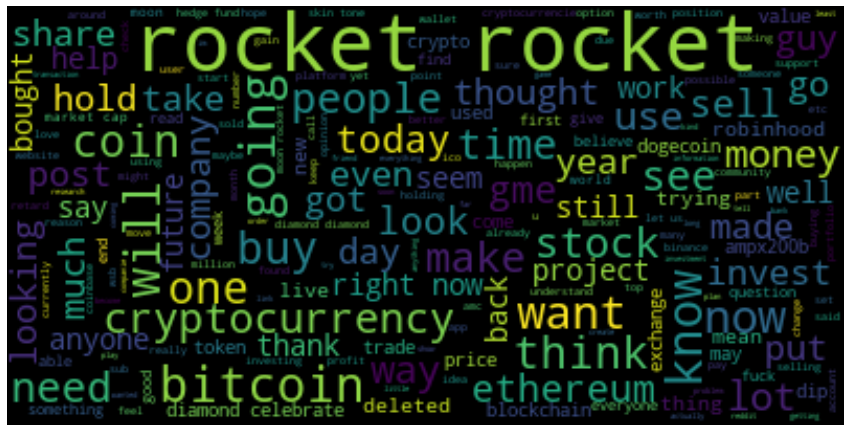

In [16]:
# Wordcloud created from all posts that have not had lemmatization and stop word removal performed.
# Note: It seems that the word cloud library does its own sort of stop word removal. See barplots below for most frequent words.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(partial_preprocessed_wcs['train_wordcloud'], interpolation='bilinear');
plt.axis("off");

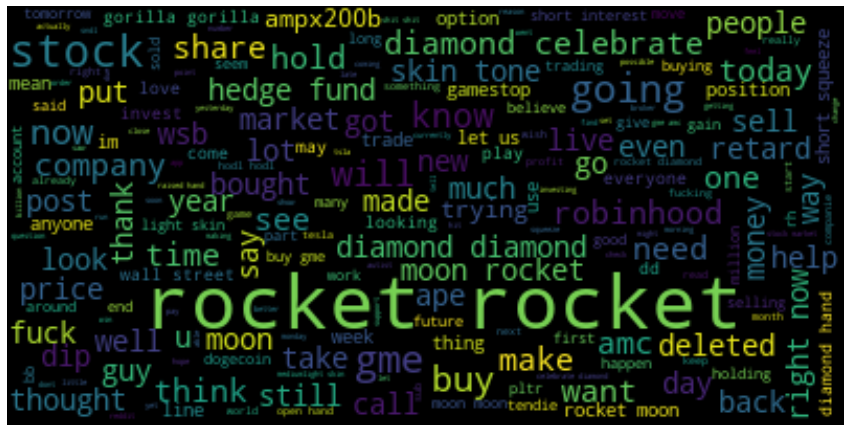

In [17]:
# Wordcloud created from wallstreetbets posts that have not had lemmatization and stop word removal performed.
# Note: It seems that the word cloud library does its own sort of stop word removal. See barplots below for most frequent words.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(partial_preprocessed_wcs['train_wordcloud_wsb'], interpolation='bilinear');
plt.axis("off");

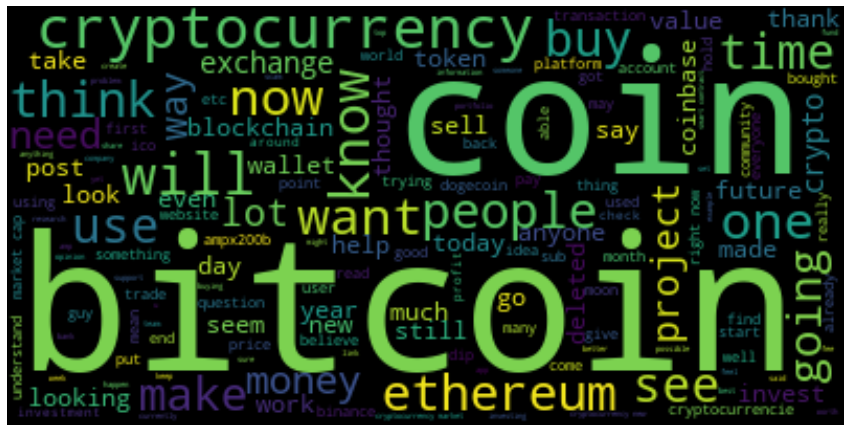

In [18]:
# Wordcloud created from CryptoCurrency posts that have not had lemmatization and stop word removal performed.
# Note: It seems that the word cloud library does its own sort of stop word removal. See barplots below for most frequent words.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(partial_preprocessed_wcs['train_wordcloud_crypto'], interpolation='bilinear');
plt.axis("off");

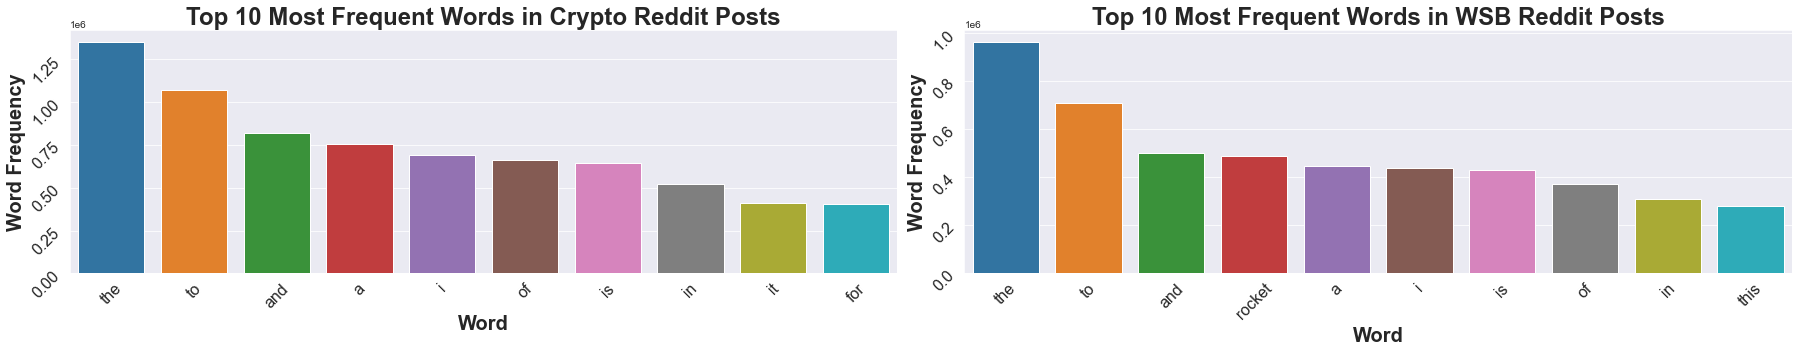

In [19]:
# Top 10 most frequent words
generate_top_word_counts(partial_preprocessed_df, largest=True, num_words=10)

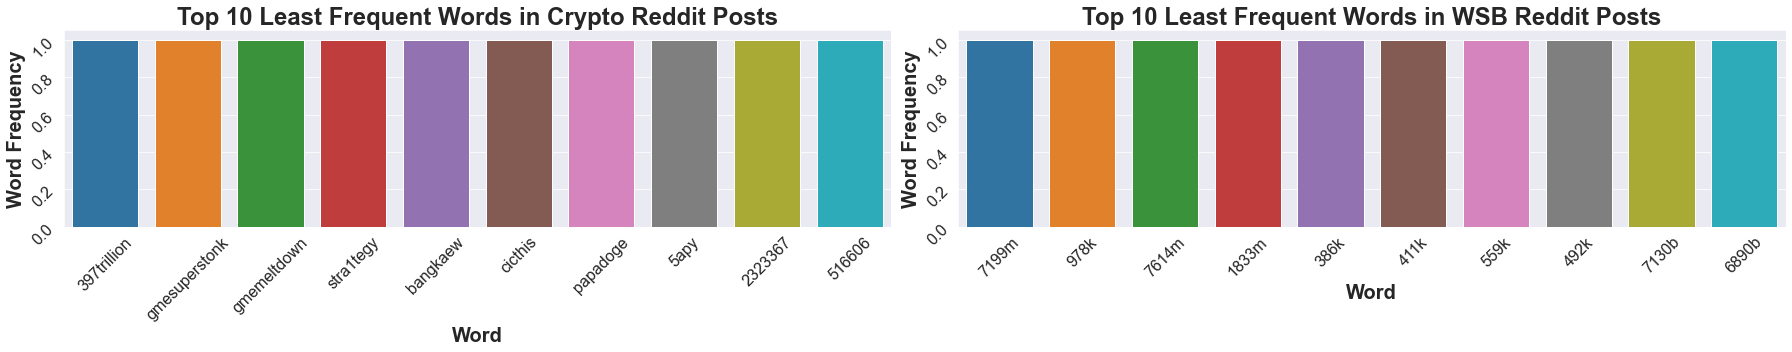

In [20]:
# Top 10 least frequent words
generate_top_word_counts(partial_preprocessed_df, largest=False, num_words=10)

## Investigate word frequencies for posts that have had lemmatization and stop word removal performed.

In [21]:
# Print word count comparison for partially preprocessed vs fully preprocessed posts.
compare_partial_to_fully_preprocessed_posts(full_preprocessed=full_preprocessed_df, partial_preprocessed=partial_preprocessed_df)

Posts without stop word removal or lemmatization.
Word Count Info...

Min word count: 1
25th Percentile: 5.0
Median word count 10.0
75th percentile: 18.0
90th percentile: 57.0
Max word count: 7863
Average word count: 29.747904137314944

Posts with stop word removal and lemmatization.
Word Count Info...

Min word count: 1
25th Percentile: 3.0
Median word count 6.0
75th percentile: 11.0
90th percentile: 27.0
Max word count: 7862
Average word count: 15.199024953548545



In [22]:
# Create Wordcloud objects for posts that have had lemmatization and stop word removal performed on them. 
full_preprocessed_wcs = build_word_clouds(full_preprocessed_df, train_only=True)

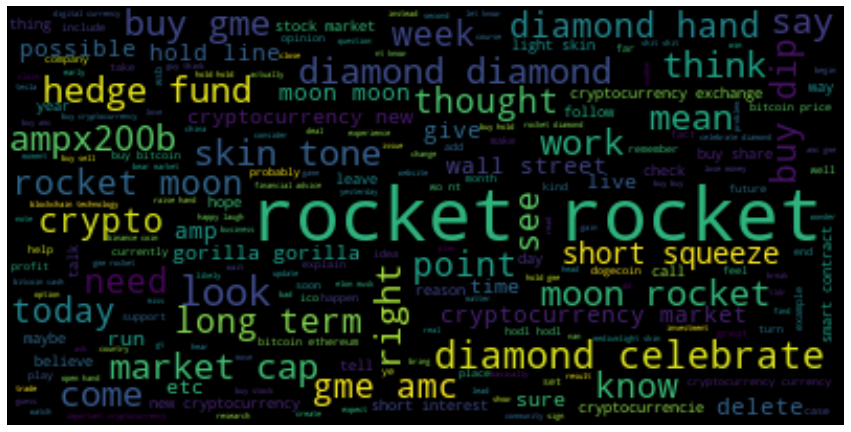

In [23]:
# Word cloud made from all subreddit posts (after lemmatization and stop word removal).
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(full_preprocessed_wcs['train_wordcloud'], interpolation='bilinear');
plt.axis("off");

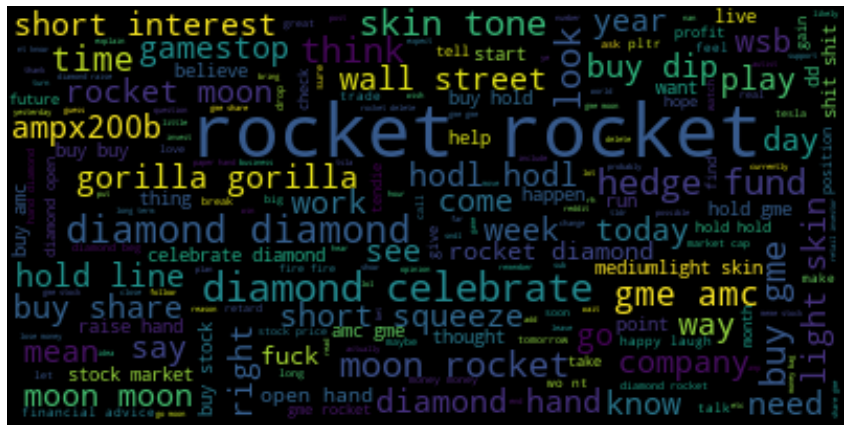

In [24]:
# Word cloud made from only wallstreetbets subreddit posts (after lemmatization and stop word removal).
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(full_preprocessed_wcs['train_wordcloud_wsb'], interpolation='bilinear');
plt.axis("off");

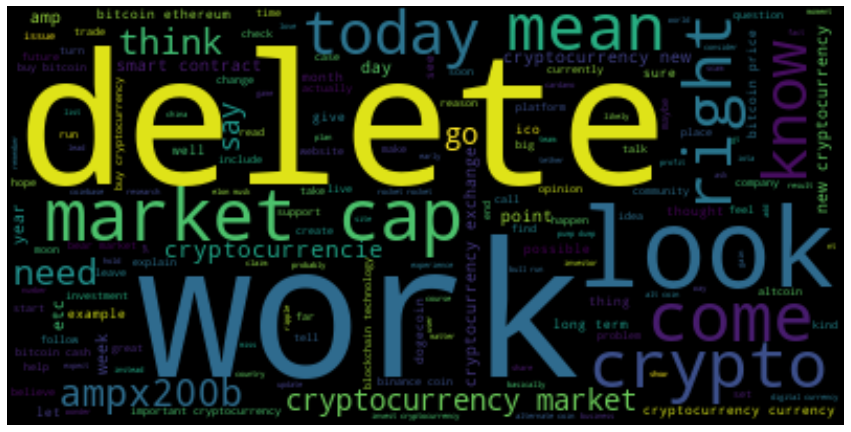

In [25]:
# Word cloud made from only CryptoCurrency subreddit posts (after lemmatization and stop word removal).
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(full_preprocessed_wcs['train_wordcloud_crypto'], interpolation='bilinear');
plt.axis("off");

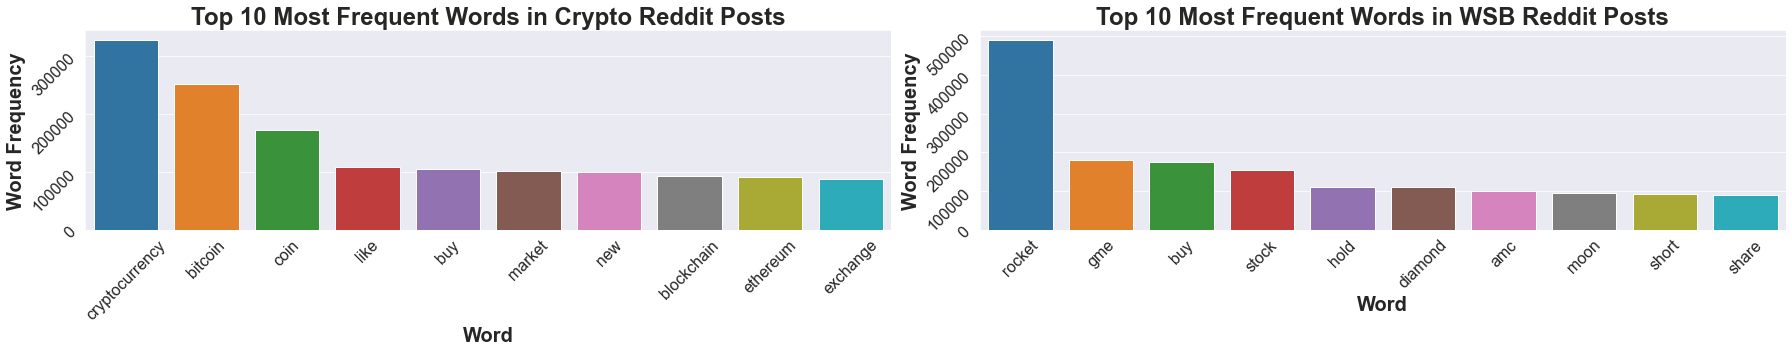

In [26]:
# Top 10 most frequent words
generate_top_word_counts(full_preprocessed_df, largest=True, num_words=10)

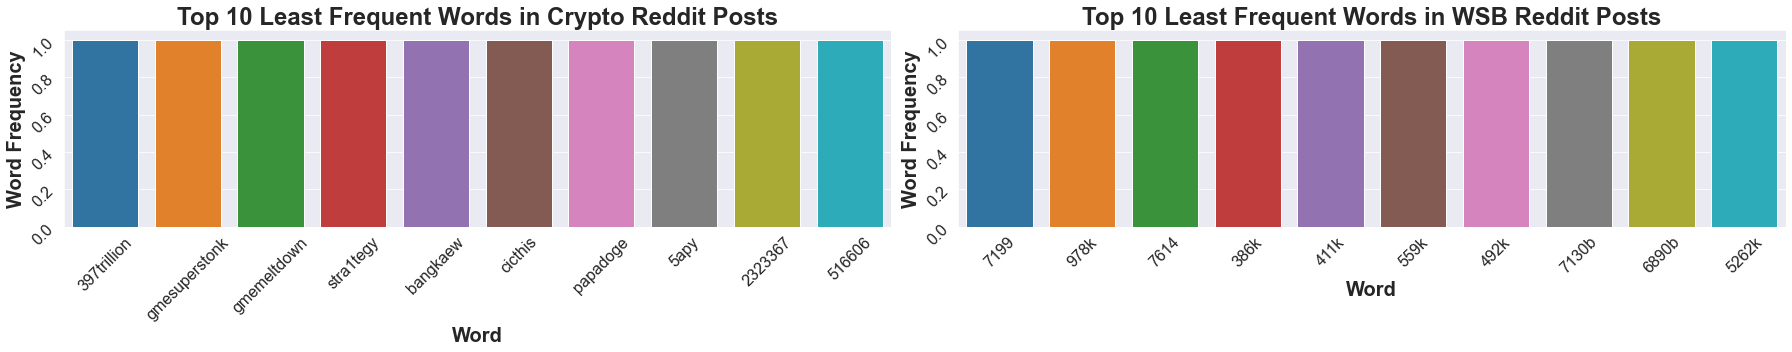

In [27]:
# Top 10 least frequent words
generate_top_word_counts(full_preprocessed_df, largest=False, num_words=10)

## Investigate word frequencies for posts 5 to 20 words in length.

In [28]:
# Create a subset of the data that only contains posts that are between 5 and 20 words in length
fiveTwenty_df = filter_samples_by_word_count(full_preprocessed_df, word_count_max=20, word_count_min=5)

In [29]:
# Number of posts that have between 5 and 20 words.
len(fiveTwenty_df.index)

1017147

In [30]:
# Number of 5-20 word posts posts from each subreddit.
fiveTwenty_df['subreddit'].value_counts()

CryptoCurrency    511301
wallstreetbets    505846
Name: subreddit, dtype: int64

In [31]:
# Percentage of 5-20 word posts that come from each subreddit.
fiveTwenty_df['subreddit'].value_counts(normalize=True)

CryptoCurrency    0.502682
wallstreetbets    0.497318
Name: subreddit, dtype: float64

In [32]:
# Distribution of word counts within the 5-20 word posts.
compare_partial_to_fully_preprocessed_posts(full_preprocessed=fiveTwenty_df)

Posts with stop word removal and lemmatization.
Word Count Info...

Min word count: 5
25th Percentile: 6.0
Median word count 8.0
75th percentile: 11.0
90th percentile: 15.0
Max word count: 20
Average word count: 8.780425051639536



In [33]:
# Build word clouds for the 5-20 word posts
fiveTwenty_wcs = build_word_clouds(fiveTwenty_df, train_only=True)

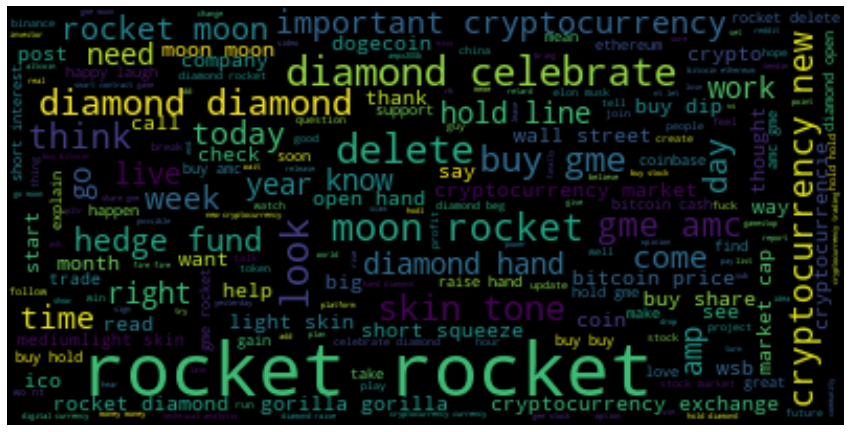

In [34]:
# Word cloud made from considering text from all 5 to 20 word posts.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(fiveTwenty_wcs['train_wordcloud'], interpolation='bilinear');
plt.axis("off");

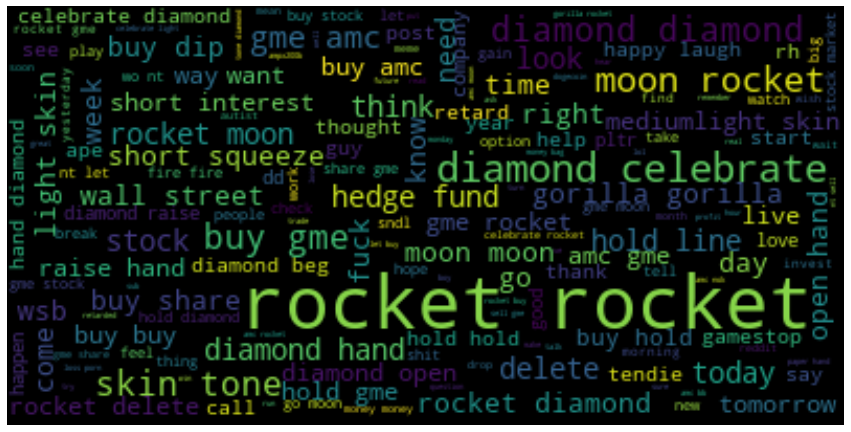

In [35]:
# Word cloud made from only wallstreetbets subreddit posts that are 5 to 20 words in length.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(fiveTwenty_wcs['train_wordcloud_wsb'], interpolation='bilinear');
plt.axis("off");

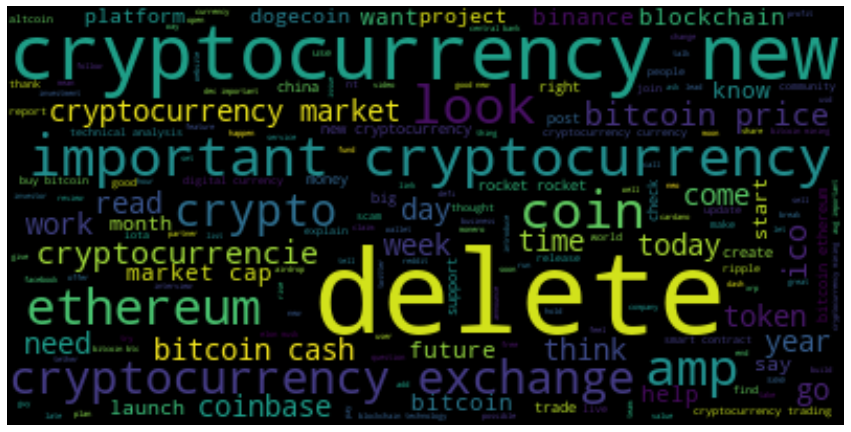

In [36]:
# Word cloud made from only CryptoCurrency subreddit posts that are 5 to 20 words in length.
fig = plt.figure()
fig.set_size_inches(15,10)
plt.imshow(fiveTwenty_wcs['train_wordcloud_crypto'], interpolation='bilinear');
plt.axis("off");

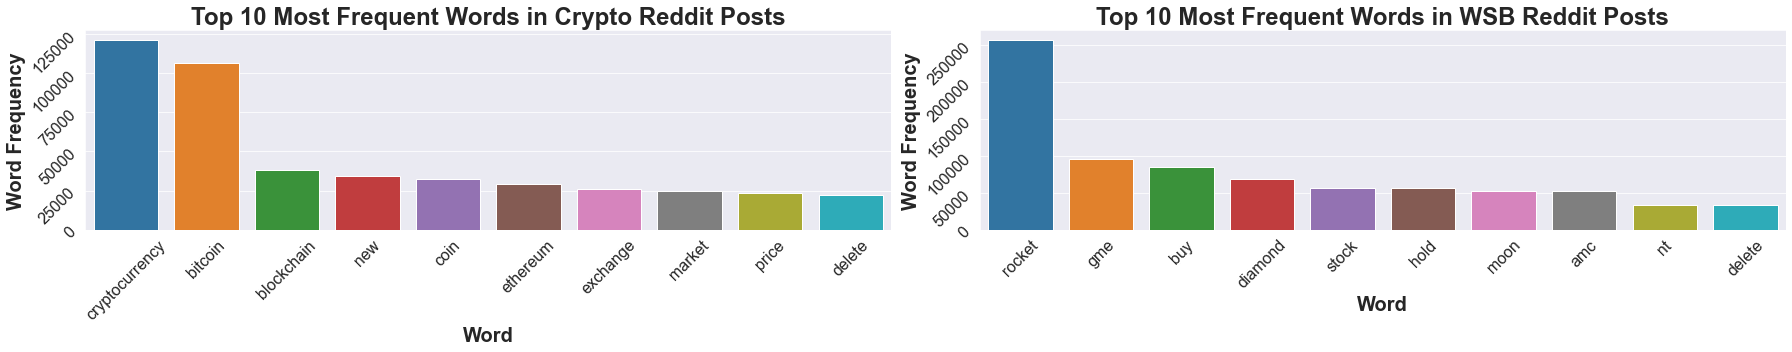

In [37]:
# Top 10 most frequent words
generate_top_word_counts(fiveTwenty_df, largest=True, num_words=10)

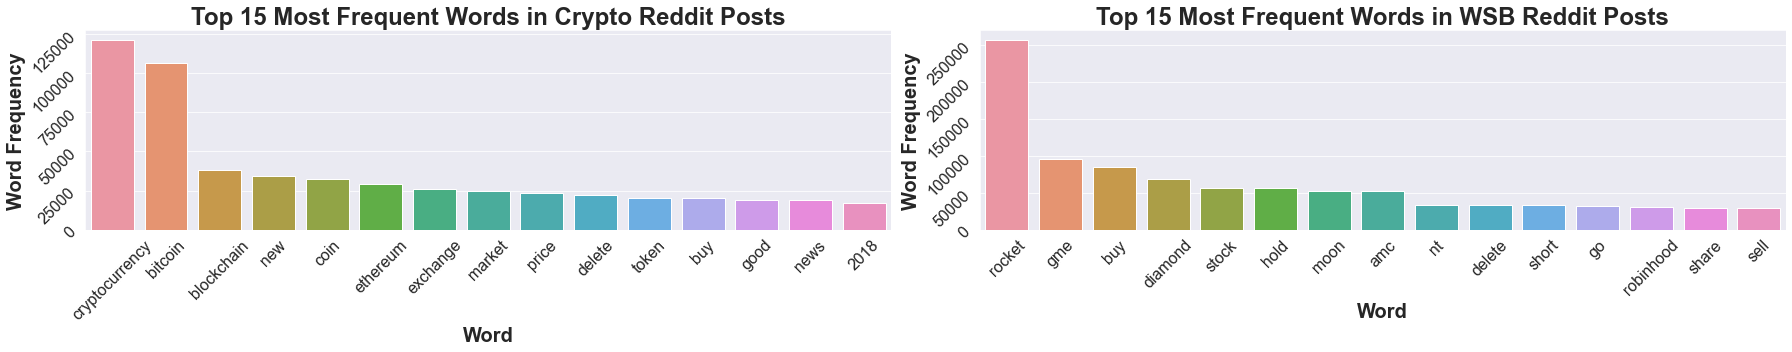

In [38]:
# Top 15 most frequent words
generate_top_word_counts(fiveTwenty_df, largest=True, num_words=15)

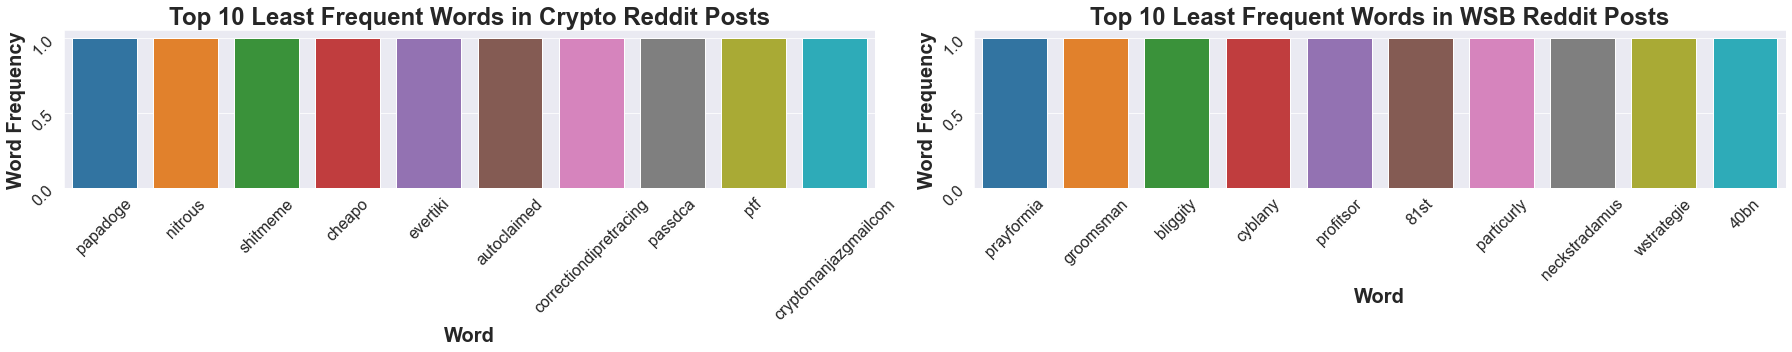

In [39]:
# Top 10 least frequent words
generate_top_word_counts(fiveTwenty_df, largest=False, num_words=10)